In [1]:
import numpy as np
import pandas as pd


In [2]:
# Assuming your CSV file is in the same directory as your Python script or Jupyter notebook
file_path = 'card_transdata.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(file_path)


In [3]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [5]:
missing_values = df.isnull().sum()
duplicate_count = df.duplicated().sum()
missing_values


distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [6]:
duplicate_count

0

In [7]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [8]:
from scipy import stats

outlier_threshold = 3  # Adjust this threshold as needed

# Assuming df is your DataFrame with the column 'distance_from_home'
z_scores = np.abs(stats.zscore(df['distance_from_home']))
outliers_count = np.sum(z_scores > outlier_threshold)

print(f"Number of rows beyond the threshold: {outliers_count}")

Number of rows beyond the threshold: 13324


In [9]:
outlier_threshold = 3  # Adjust this threshold as needed
df = df[(np.abs(stats.zscore(df['distance_from_home'])) < outlier_threshold)]

In [10]:





z_scores = np.abs(stats.zscore(df['distance_from_last_transaction']))
outliers_count = np.sum(z_scores > outlier_threshold)

print(f"Number of rows beyond the threshold: {outliers_count}")

Number of rows beyond the threshold: 6969


In [11]:
df = df[(np.abs(stats.zscore(df['distance_from_last_transaction'])) < outlier_threshold)]

In [12]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [13]:
numerical_columns = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [14]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,1.171191,-0.419774,0.043373,1.0,1.0,0.0,0.0,0.0
1,-0.339276,-0.436237,-0.189183,1.0,0.0,0.0,0.0,0.0
2,-0.523521,-0.359773,-0.498379,1.0,0.0,0.0,1.0,0.0
3,-0.614812,0.222591,-0.521592,1.0,1.0,0.0,1.0,0.0
4,0.731774,-0.388760,0.142154,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,-0.616111,-0.443881,-0.070508,1.0,1.0,0.0,0.0,0.0
999996,-0.048959,-0.131589,0.340387,1.0,1.0,0.0,0.0,0.0
999997,-0.593389,-0.278698,-0.573185,1.0,1.0,0.0,1.0,0.0
999998,-0.550244,-0.428168,-0.481213,1.0,0.0,0.0,1.0,0.0


In [15]:
import pandas as pd

# Assuming df is your DataFrame with the selected features
selected_features = [
    'distance_from_home',
    'distance_from_last_transaction',
    'ratio_to_median_purchase_price',
    'repeat_retailer',
    'used_chip',
    'used_pin_number',
    'online_order'
]

# Subset the DataFrame with selected features
subset_df = df[selected_features]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                                distance_from_home  \
distance_from_home                        1.000000   
distance_from_last_transaction            0.001131   
ratio_to_median_purchase_price           -0.000635   
repeat_retailer                           0.240736   
used_chip                                -0.000987   
used_pin_number                          -0.000235   
online_order                             -0.001136   

                                distance_from_last_transaction  \
distance_from_home                                    0.001131   
distance_from_last_transaction                        1.000000   
ratio_to_median_purchase_price                       -0.000222   
repeat_retailer                                      -0.001196   
used_chip                                            -0.000176   
used_pin_number                                       0.000756   
online_order                                          0.000643   

                  

In [19]:
df['fraud'] = df['fraud'].astype(int)
fraud_count = df['fraud'].value_counts()[1]
nonfraud_count = df['fraud'].value_counts()[0]

print(f"Number of Fraud Records: {fraud_count}")
print(f"Number of Non-Fraud Records: {nonfraud_count}")

Number of Fraud Records: 78170
Number of Non-Fraud Records: 901537


In [25]:
import pandas as pd

# Assuming 'df' is your original DataFrame with 'fraud' column
fraud_data = df[df['fraud'] == 1]
not_fraud_data = df[df['fraud'] == 0]

fraud_size = 78000
not_fraud_size = 78000

# Randomly sample a subset of fraud data
fraud_data_sampled = fraud_data.sample(n=fraud_size, random_state=42)

# Randomly sample a subset of not fraud data
not_fraud_data_sampled = not_fraud_data.sample(n=not_fraud_size, random_state=42)

# Concatenate fraud and sampled not fraud data to create a partially balanced dataset
random_sample_df = pd.concat([fraud_data_sampled, not_fraud_data_sampled])

# Shuffle the dataset
random_sample_df = random_sample_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the partially balanced dataset
print(random_sample_df)


        distance_from_home  distance_from_last_transaction  \
0                 2.135172                       -0.342200   
1                -0.280092                       -0.097163   
2                -0.591157                       -0.404088   
3                 0.027605                       -0.343930   
4                -0.572827                       -0.131327   
...                    ...                             ...   
155995           -0.649760                       -0.265779   
155996           -0.592356                       -0.424542   
155997           -0.124596                        0.730777   
155998            0.449753                       -0.436207   
155999            0.734617                       -0.236792   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                            -0.618473              1.0        1.0   
1                             1.048898              1.0        0.0   
2                             3.745213       

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'selected_features' is a list of feature names
selected_features = [
    'distance_from_home',
    'distance_from_last_transaction',
    'ratio_to_median_purchase_price',
    'repeat_retailer',
    'used_chip',
    'used_pin_number',
    'online_order'
]

# Separate features and target variable
X = random_sample_df[selected_features]
y = random_sample_df['fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model_lr = LogisticRegression(random_state=42)

# Fit the model to the training data
model_lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = model_lr.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

print("Logistic Regression Model:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)
print("Confusion Matrix:")
print(conf_matrix_lr)


Logistic Regression Model:
Accuracy: 0.9518269230769231
Precision: 0.9380353904833365
Recall: 0.9669975505994586
F1 Score: 0.95229631510458
Confusion Matrix:
[[14695   991]
 [  512 15002]]


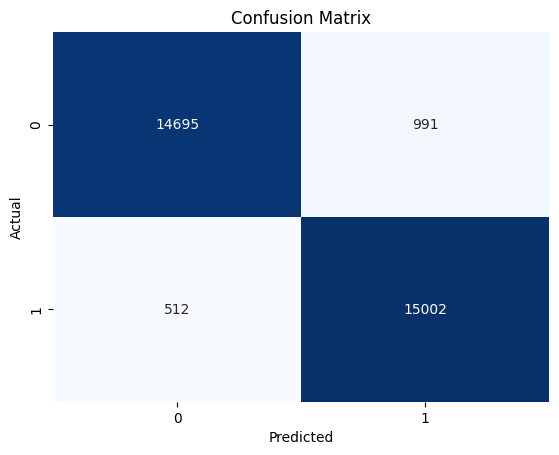

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


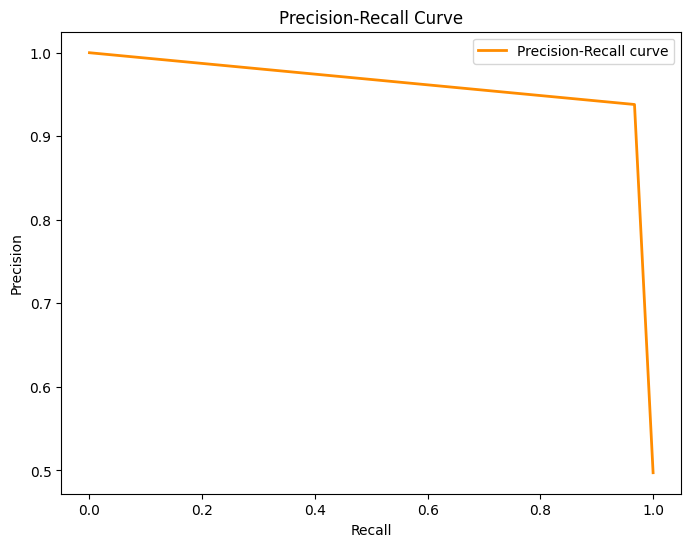

In [28]:
from sklearn.metrics import precision_recall_curve

# Get precision, recall, and thresholds
precision, recall, _ = precision_recall_curve(y_test, y_pred_lr)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='upper right')
plt.show()


In [36]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
model_dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = model_dt.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print("Decision Tree Model:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)
print("Confusion Matrix:")
print(conf_matrix_dt)

Decision Tree Model:
Accuracy: 0.9999679487179487
Precision: 1.0
Recall: 0.9999355420910145
F1 Score: 0.9999677700067683
Confusion Matrix:
[[15686     0]
 [    1 15513]]


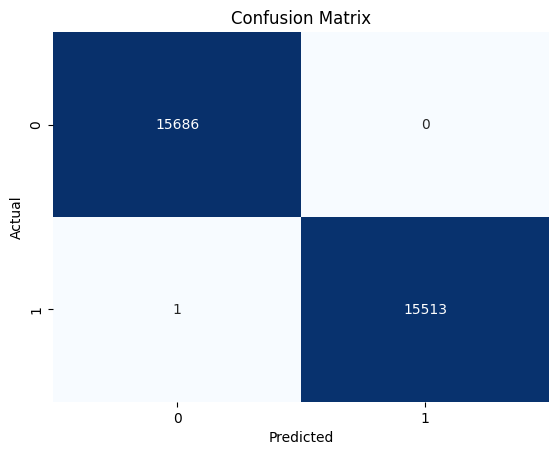

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


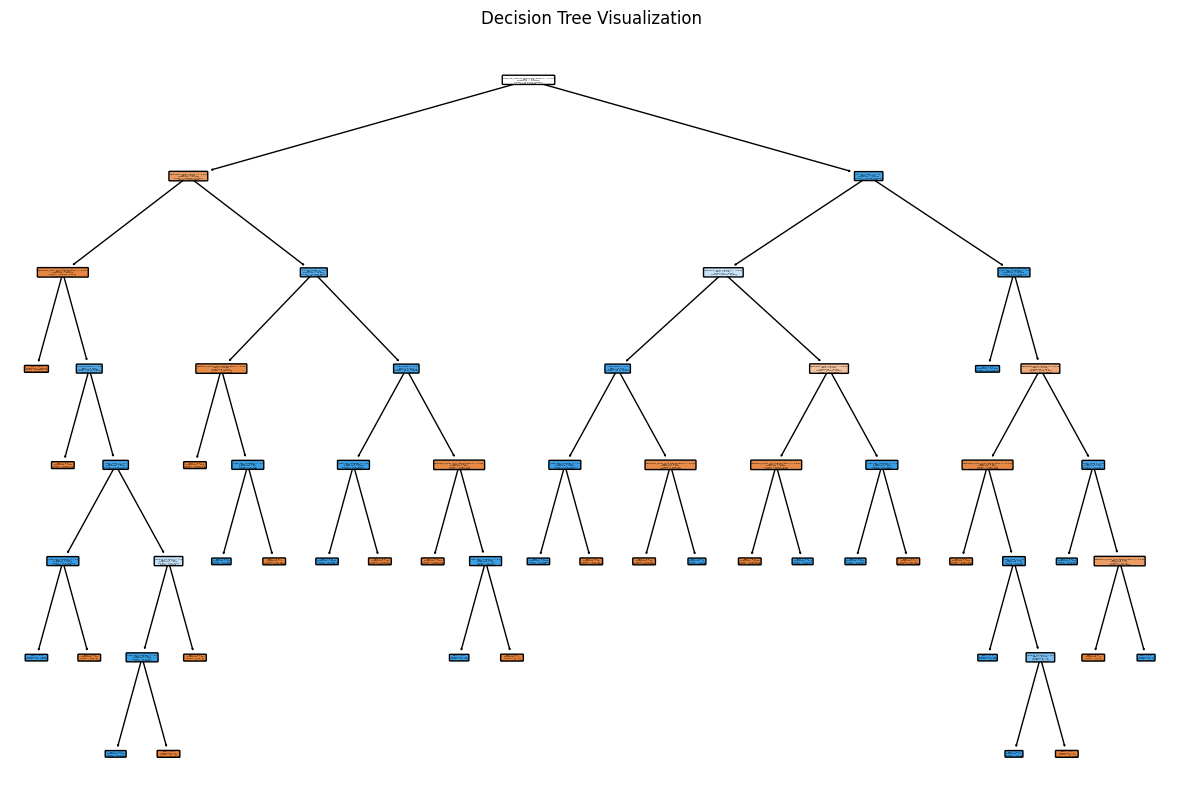

In [38]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(model_dt, feature_names=selected_features, class_names=['Not Fraud', 'Fraud'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


In [40]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
model_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = model_rf.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Model:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

Random Forest Model:
Accuracy: 0.9999679487179487
Precision: 1.0
Recall: 0.9999355420910145
F1 Score: 0.9999677700067683
Confusion Matrix:
[[15686     0]
 [    1 15513]]


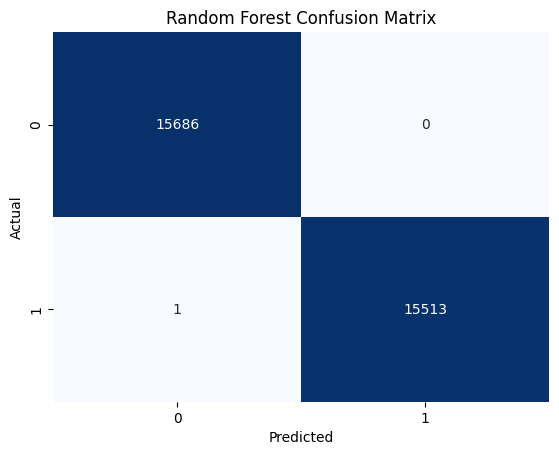

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


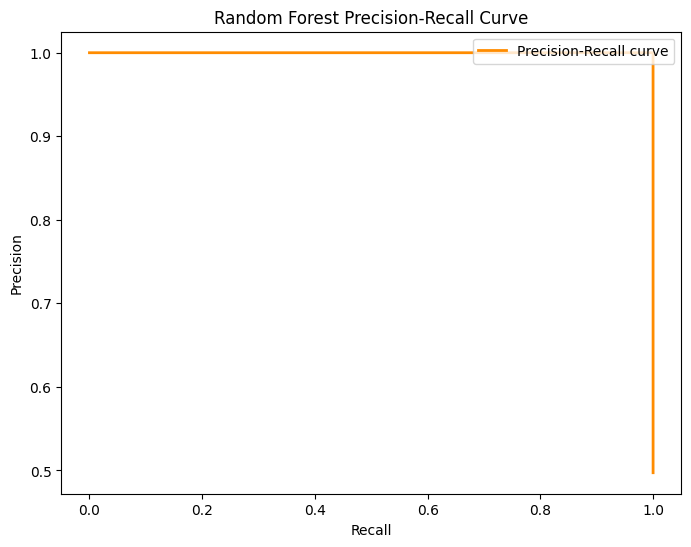

In [44]:
from sklearn.metrics import precision_recall_curve

# Get precision, recall, and thresholds
precision, recall, _ = precision_recall_curve(y_test, y_pred_rf)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.title('Random Forest Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='upper right')
plt.show()
